# 🧪 Actividad Evaluada: Árboles de Decisión en el Dataset Titanic

📚 **Curso:** Machine Learning

## 📝 Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como código y asegúrate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentación oficial de Python y Scikit-learn.

## 📄 Descripción del Dataset
El dataset **Titanic** contiene información sobre los pasajeros del famoso barco Titanic que naufragó en 1912. El objetivo es predecir si un pasajero sobrevivió o no (`Survived` = 1 si sobrevivió, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje automático como un primer ejemplo de clasificación supervisada.

---

# 🌊 Actividad Evaluada: Árboles de Decisión con el Dataset Titanic

En esta actividad aplicarás un modelo de árboles de decisión sobre el dataset Titanic.

### 🎯 Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categóricas con One Hot Encoding
- Entrenar un árbol de decisión
- Visualizar el árbol
- Evaluar el desempeño del modelo

🕐 Tiempo estimado: 60 a 90 minutos

In [3]:
# 📥 Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 1. Exploración inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta sección, deberás realizar una exploración básica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estadísticas descriptivas de las variables numéricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitirán decidir qué pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta sección, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [4]:
# Mostrar la información general del dataset
df.info()

# Calcular y mostrar estadísticas descriptivas de las variables numéricas
print(df.describe())

# Revisar la cantidad de valores nulos en cada columna
print(df.isnull().sum())

# Observaciones:
# - La información de df.info() nos muestra la cantidad de entradas, tipos de datos y si existen valores nulos.
# - df.describe() permite identificar el rango, media, desviación estándar y percentiles de las variables numéricas.
# - La función df.isnull().sum() ayuda a identificar columnas con valores faltantes, lo que es crítico para decidir los pasos de imputación o eliminación.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    

## 🧹 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan información útil al modelo o contienen datos difíciles de procesar automáticamente (como texto libre o demasiados valores únicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, así que puedes usar la **moda** (valor más frecuente) para completarlos.

3. **Codificación de variables categóricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categóricas como `Sex` y `Embarked`, transformándolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ⚠️ **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempeño del algoritmo.

Al finalizar esta etapa, deberías tener un dataset **limpio, sin valores nulos y completamente numérico**.

In [6]:
# Eliminar columnas innecesarias
df_clean = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Manejo de valores faltantes
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

# Codificación de variables categóricas con One Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['Sex', 'Embarked'], drop_first=True)

# Mostrar las primeras filas para verificar los cambios
df_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## 🧠 3. Entrenamiento del modelo de Árbol de Decisión

En esta etapa, construiremos un modelo predictivo utilizando un **Árbol de Decisión**, una técnica de clasificación que divide los datos en ramas sucesivas para tomar decisiones basadas en las características del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` será nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una división, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el parámetro `max_depth` para limitar la profundidad del árbol y evitar sobreajuste.

Cuando termines esta sección, tu modelo estará entrenado y listo para ser evaluado y visualizado.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Separar las variables predictoras (X) y la variable objetivo (y)
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

# 2. Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo con DecisionTreeClassifier (limitando la profundidad)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 🌳 4. Visualización del árbol

Una de las grandes ventajas de los árboles de decisión es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretación del modelo**.

En esta sección usaremos la función `plot_tree()` de `sklearn` para graficar el árbol entrenado. En el gráfico:

- Cada **nodo interno** representa una condición de decisión sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisión (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cuántas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los parámetros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del árbol. Asegúrate de usar `plt.figure(figsize=(ancho, alto))` para que la visualización no se corte.

**Objetivo:** Entender cómo el modelo está tomando decisiones, qué variables usa y con qué prioridad.

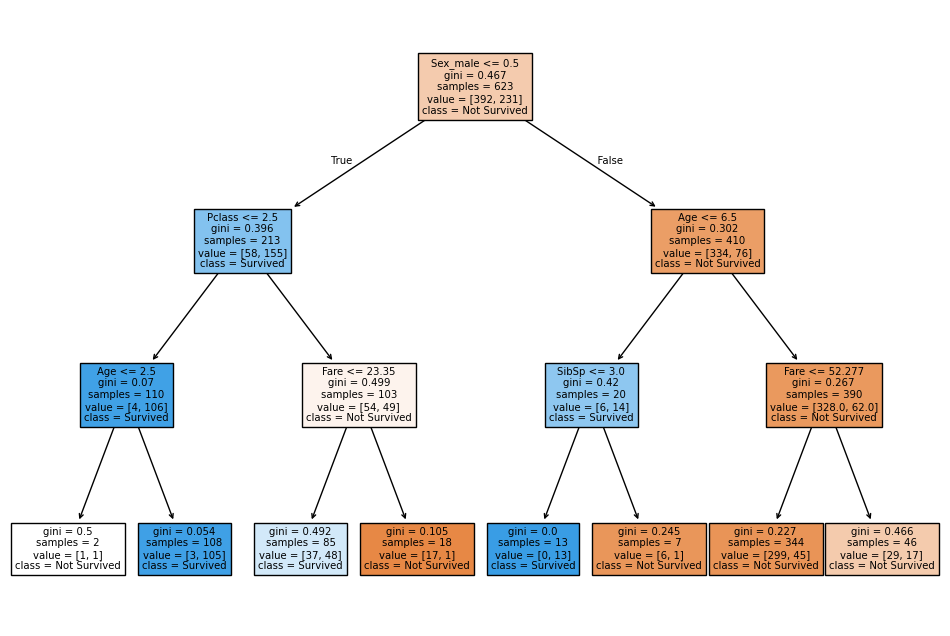

In [8]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

## 📈 5. Evaluación del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempeño** para entender qué tan bien está funcionando. En esta sección usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular métricas que nos ayuden a juzgar la calidad de las predicciones.

### Métricas que utilizaremos:

- **Matriz de confusión (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es útil para entender errores específicos del modelo.
- **Reporte de clasificación (`classification_report`)**: incluye precisión (*precision*), exhaustividad (*recall*), y la métrica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qué porcentaje total de predicciones fue correcto.

Estas métricas te permitirán **identificar si el modelo está desbalanceado**, si tiende a predecir más una clase que otra, y si necesita ajustes en parámetros o preprocesamiento.

> 💡 Recuerda: un modelo con buena precisión pero bajo *recall* puede ser problemático si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Obtener predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar las métricas
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[139  18]
 [ 33  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8097014925373134


---
## 🤔 Preguntas de Reflexión

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?

2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?

3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?

4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?

5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?


**1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?**

se puede observar que las variables que mas afectaban a la supervivencia eran el sexo y la clase del pasajero, ya que las mujeres y los pasajeros de primera clase tenían una mayor probabilidad de sobrevivir. También se puede observar que la" pclass" y el "sexo",
ya que se puede establecer que la union de estas, podia más o menos predecir la supervivencia, donde si era hombre y de primera clase, es bastante probable que sobreviviera.

**2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?**

Si no se controla su profundidad, el árbol puede volverse muy complejo y ajustarse en exceso a los datos de entrenamiento (sobreajuste). Esto afecta negativamente su capacidad para generalizar a datos nuevos y también puede dificultar la interpretación del modelo.

**3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?**

La codificación ordinal asigna un número entero a cada categoría, lo que puede inducir al modelo a interpretar un orden lógico o numérico entre ellas, incluso si no existe (por ejemplo, asignar 0, 1 y 2 a categorías sin jerarquía real). En cambio, One Hot Encoding crea columnas binarias independientes para cada categoría, evitando supuestos de orden y permitiendo una representación más neutral de variables nominales.

**4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?**

Considerar el uso de modelos ensemble (como Random Forest) para mejorar la generalizacion

**5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?**

En su forma actual, no recomendaría implementar este modelo directamente en un entorno real. Antes de desplegarlo, sería necesario realizar ajustes para mejorar su precisión y robustez, como la optimización de hiperparámetros, validación cruzada y la incorporación de enfoques ensemble para reducir el sobreajuste. Además, es fundamental garantizar la calidad y consistencia de los datos, implementar un sistema de monitorización constante y actualizar el modelo según sea necesario. Finalmente, se debe evaluar y mitigar posibles sesgos para asegurar que el modelo opere de manera ética y justa en producción.